# Plotting the Forbidden Region
We'll show how to compute the Jacobi Constant and use it to constrain our system

In [1]:
@time using ThreeBodyProblem
@time using OrdinaryDiffEq
@time using Plots

 12.051739 seconds (23.78 M allocations: 1.615 GiB, 6.23% gc time)
  0.000096 seconds (99 allocations: 7.672 KiB)
  0.000097 seconds (99 allocations: 7.672 KiB)


### We'll work in the Earth-Moon system because the mass parameter is relatively large

In [2]:
sys = earth_moon()

System(Body(5.97237e24, 6371.0084, 1.495978976276167e8, 3.155814910224e7, "Earth", :blue), Body(7.3457905697975825e22, 1737.5, 384400.0, 2.3606208e6, "Moon", :grey), 384400.0, 2.3606208e6, 398613.89090999996, 4902.801, 0.012150181388514944, 6371.0084, 1737.5, 398613.89090999996, 4902.801, 0.012150181388514944, 6371.0084, 1737.5, 6.045827905697976e24, 384400.0, 375704.4690855444, 1.0231446033517257, 2.7232697173979187e-6, "Earth/Moon")

# Jacobi Constant
In the CR3BP there is only one conserved quantity, the Jacobi constant C. It is related to the mechanical energy, only it is computed in the rotating frame. The Jacobi constant is a function of the state vector, and it is a constant of motion. Here we'll show how to compute the Jacobi constant expicitly then point you to the functions that do it for you.

In [3]:
# First, let's define some initial conditions
x = 0.5;    y = 0;      z = 0;
ẋ = 0;      ẏ = 0.5;    ż = 0;

In [4]:
# Next we compute the relative distances to the primary and secondary bodies
μ = sys.μ
r₁ = sqrt((x + μ)^2      + y^2 + z^2)
r₂ = sqrt((x - 1 + μ)^2  + y^2 + z^2)

0.4878498186114851

In [5]:
# There is a built-in function to compute r₁ and r₂. It requires the position to be in vector form.
r = [x, y, z]
r₁, r₂ = computer1r2(r, sys)

(0.512150181388515, 0.4878498186114851)

In [6]:
# Now we can compute the Jacobi constant
C =  x^2 + y^2 + 2*(1-sys.μ)/r₁ + 2*sys.μ/r₂ - (ẋ^2 + ẏ^2 + ż^2)

3.9074679690702565

Note that the first four terms only depend on the position, and the last term only depends on the velocity.
Looks a lot like potential and kinetic energy, right?
The x² and y² terms come from the fact that our reference frame is rotating

In [7]:
# Again, there is a built-in function for this, but it requires the states to be in vector form.
rv = [x, y, z, ẋ, ẏ, ż]
C = computeC(rv,sys)

3.9074679690702565

In [8]:
# If we input a position vector to computeC(), it will assume the velocity is zero and return the 
# Jacobi constant for a stationary object at that position
C_pos = computeC(r,sys)

4.1574679690702565

In [9]:
# We can use this functionality to compute the Jacobi constant of the Lagrange Points
r_L1 = computeL1(sys)
C_L1 = computeC(r_L1,sys)

3.188337390220741

In [10]:
# There's already a built-in function to compute the Jacobi constant of all the Lagrange Points
CLpts = computeCLpts(sys)
CLpts[1]

3.188337390220741

In [11]:
# We can also compute the Jacobi constant of a set of states or trajectory, which is a vector of vectors
init_conds = [[x,y,z,ẋ,ẏ,ż] for _ in 1:100]
C_ic = computeC(init_conds, sys);

In [12]:
# If you've computed a trajectory using an ODE solver, you can just input the 'u' field of the solution
prob = ODEProblem(CR3BPdynamics!, rv, (0.0, 1.0), sys)
traj = solve(prob, TsitPap8(), reltol=1e-12, abstol=1e-12)
C_traj = computeC(traj.u, sys);

### Constant of Motion
Since the Jacobi constant is a constant of motion, the maximum and minimum values of the trajectory should be the same

In [13]:
maximum(C_traj) - minimum(C_traj)

3.2507330161024584e-13

any error is due to numerical precision

# Zero-Velocity Surface
For a given Jacobi constant, we can compute the corresponding zero-velocity surface. Τhe zero-velocity surface is the set of points that share the same Jacobi constant if their velocity is zero. The zero-velocity surface is a 2D manifold, so it is a 2D surface in 3D space. However, We'll just plot the x-y plane. The zero-velocity surface is a closed surface, so we can plot it as a contour plot. The interior of the contour plot is the forbidden region.

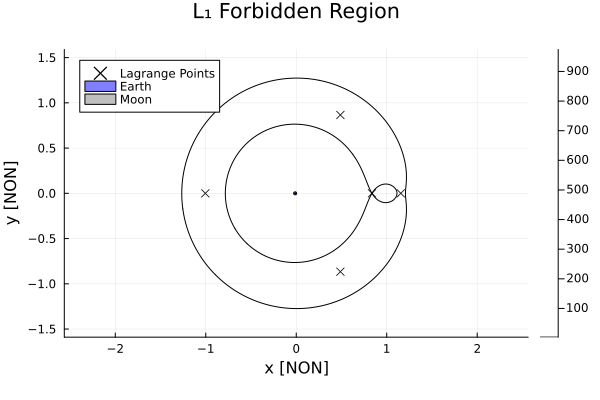

In [14]:
N = 1000 # Number of points to plot, square grid
X = Y = range(-1.5, 1.5, length=N) # Range of x and y values
f(x,y) = computeC([x,y,0],sys) # Function to plot
plot_fb = plot(sys); # Plot the system
contour!(plot_fb, X,Y,f,levels=[CLpts[1]],title="L₁ Forbidden Region") # Plot the forbidden region


### Zoom in

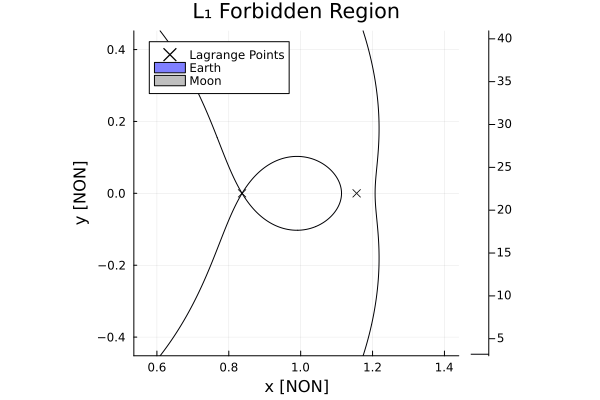

In [15]:
# Let's zoom in on the zero-velocity surface close to the secondary
N = 1000
xlims,ylims = seczoom(sys,N=100)
X = range(xlims[1], xlims[2], length=N)
Y = range(ylims[1], ylims[2], length=N)
plot_fbzoom = plot(sys, xlims=xlims, ylims=ylims);
contour!(plot_fbzoom,X,Y,f,levels=[CLpts[1]],title="L₁ Forbidden Region")

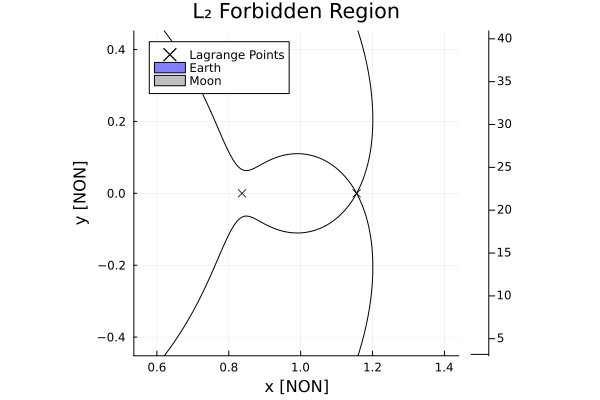

In [16]:
# Now what happens when we change the Jacobi constant to C_L2? 
plot_fb = plot(sys, xlims=xlims, ylims=ylims);
contour!(plot_fb,X,Y,f,levels=[CLpts[2]],title="L₂ Forbidden Region")

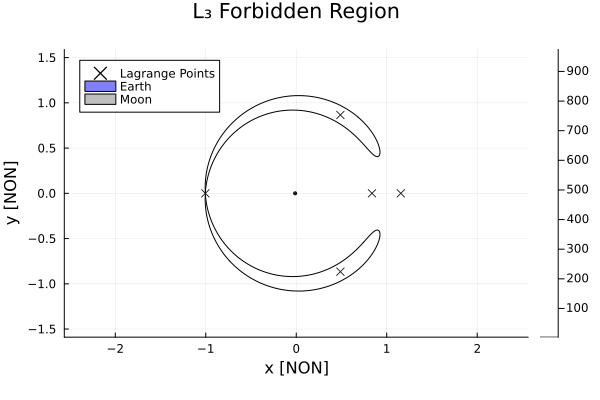

In [17]:
# Now what happens when we change the Jacobi constant to C_L3? 
X = Y = range(-1.5, 1.5, length=N) # We'll have to zoom out again
plot_fb = plot(sys);
contour!(plot_fb,X,Y,f,levels=[CLpts[3]],title="L₃ Forbidden Region")

At C_L4 = C_L5, the forbidden region is gone entirely